In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

C:\Users\hp-pc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,NaN,NaN,127,cases


In [4]:
df = df[df['report_date'].notna()]
df['report_date'] = df['report_date'].str.replace('_','-')
df.drop(['time_period_type','time_period'],axis=1,inplace=True)

In [5]:
df['report_date'] = pd.to_datetime(df['report_date'])

In [6]:
df['value'].fillna(0,inplace=True)
df['value'] = df['value'].astype(str)

In [7]:
trans_dict ={"*": None}
trans_table ="*".maketrans(trans_dict)
df['value'] = df['value'].str.translate(trans_table)

In [8]:
df['value'] = pd.to_numeric(df['value'])

# 1. show data field code 'AR0005' values for 'Argentina-Catamarca' for entire duration

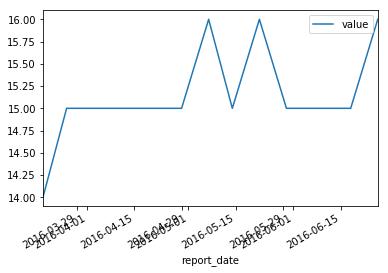

In [9]:
val = df.query('data_field_code == "AR0005" and location=="Argentina-Catamarca"')
val[['report_date','value']].plot(x='report_date',y='value')

# 2. Plot 'Argentina-CABA' and 'Argentina-Catamarca' for number of cases values for entire duration to identify the difference

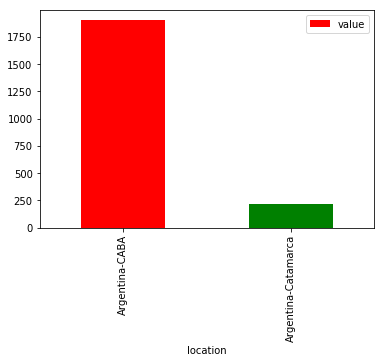

In [16]:
val = df.query('(location == "Argentina-CABA" or location == "Argentina-Catamarca") and unit=="cases"')[['location','value']]
val.groupby('location').agg('sum').plot(kind='bar',y='value',color=['r','g'])

# 3. Plot how data field values are distributed across the locations 'Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B2B0F60>],
      dtype=object)

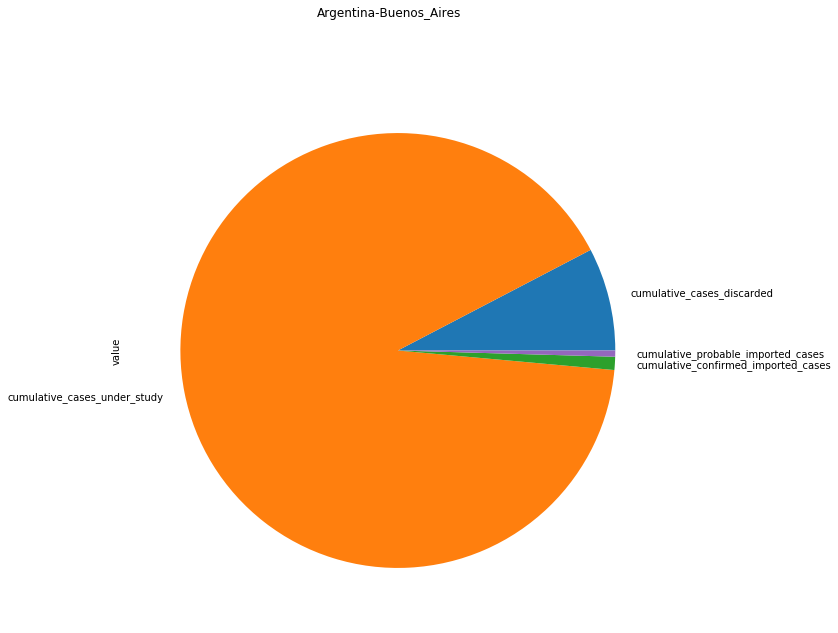

In [31]:
bue = df.query('location == "Argentina-Buenos_Aires"')[['data_field','value']].groupby('data_field').agg('sum')
bue.plot(kind='pie',subplots=True,figsize=(10,10),legend=False,title='Argentina-Buenos_Aires')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B7DE5F8>],
      dtype=object)

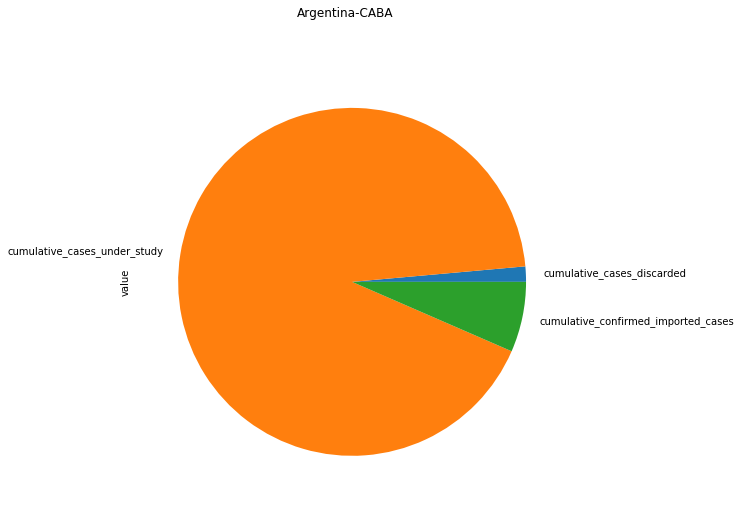

In [35]:
caba = df.query('location == "Argentina-CABA"')[['data_field','value']].groupby('data_field').agg('sum')
caba.plot(kind='pie',subplots=True,figsize=(8,8),legend=False,title='Argentina-CABA')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009E4C668>],
      dtype=object)

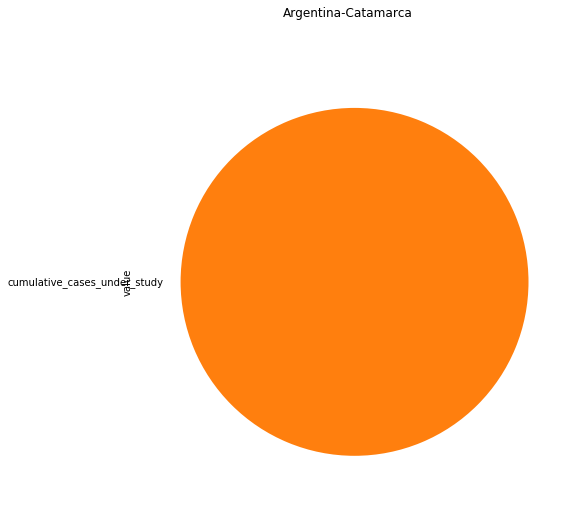

In [44]:
caba = df.query('location == "Argentina-Catamarca"')[['data_field','value']].groupby('data_field').agg('sum')
caba.plot(kind='pie',subplots=True,figsize=(8,8),legend=False,title='Argentina-Catamarca')

# 4. Build a program to predict the correct word for wrongly typed word. for example whst => what, numbr =>number, good => good

In [262]:
from collections import Counter

f = open(r'big.txt')
p = Counter(f.read().split())
big_word = pd.DataFrame.from_dict(p,orient='index').reset_index()

In [263]:
big_word.drop(columns=[0],inplace=True)

big_word = big_word[big_word['index'].str.isalpha()]

In [285]:
big_word['count'] = 0
word = input('Enter a word')

for i in range(len(word)):
    big_word.loc[big_word['index'].str.find(word[i],i,i+1) != -1,'count'] += 1
    big_word.loc[big_word['index'].str.find(word[i],i,i+1) == -1,'count'] -= 1

m_word = big_word#big_word[big_word['index'].str.len() >= len(word)]
idx = m_word[m_word['count'] == m_word['count'].max()]['index'].str.len().idxmin()
print(m_word.loc[idx][0])

Enter a wordtthe
other
